In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X, y_true = make_blobs(n_samples = 500, centers = 3, cluster_std=0.60, random_state=42)

In [3]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [4]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [6]:
inertia =[] 
K_range = range(1,11) 


In [7]:
import warnings
warnings.filterwarnings("ignore")

for k in K_range: 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

  File "C:\Users\samsung\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\samsung\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\samsung\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\samsung\anaconda3\Lib\sub

In [8]:
inertia 

[1000.0000000000001,
 297.8954141051722,
 11.57548472310498,
 9.75206797735684,
 8.25717527244628,
 6.917577320416799,
 6.334755391595288,
 5.70417717790143,
 5.060234133532076,
 4.762361898130397]

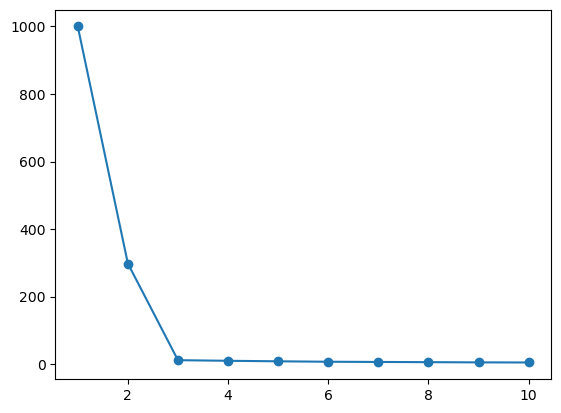

In [9]:
plt.plot(K_range, inertia, marker ='o')

In [28]:
kmeans_final = KMeans(n_clusters= 6, random_state=42 )

In [29]:
cluster_labels

array([0, 8, 2, 1, 2, 2, 0, 2, 8, 6, 8, 1, 1, 9, 5, 2, 9, 6, 3, 4, 8, 1,
       2, 0, 6, 2, 5, 0, 3, 9, 2, 9, 4, 4, 2, 2, 8, 8, 3, 0, 8, 9, 4, 1,
       9, 2, 2, 2, 8, 6, 6, 9, 6, 7, 5, 4, 1, 3, 2, 6, 3, 9, 8, 7, 5, 3,
       2, 7, 1, 2, 5, 5, 2, 7, 4, 3, 1, 8, 1, 1, 7, 9, 8, 9, 6, 6, 3, 3,
       8, 1, 6, 5, 4, 2, 2, 7, 9, 4, 9, 0, 2, 9, 1, 3, 7, 1, 4, 7, 4, 6,
       6, 6, 3, 7, 0, 8, 4, 3, 8, 6, 1, 9, 8, 8, 3, 2, 4, 8, 6, 7, 3, 2,
       8, 0, 2, 6, 0, 6, 8, 4, 7, 0, 5, 8, 6, 6, 3, 4, 1, 4, 2, 6, 8, 8,
       9, 6, 1, 7, 2, 8, 0, 3, 9, 9, 3, 4, 4, 5, 6, 6, 0, 9, 1, 3, 7, 4,
       9, 8, 2, 5, 9, 3, 9, 1, 0, 6, 9, 5, 1, 7, 3, 3, 0, 7, 4, 2, 9, 9,
       3, 2, 9, 1, 3, 3, 5, 7, 8, 9, 9, 6, 0, 5, 7, 4, 9, 7, 9, 7, 1, 2,
       5, 4, 6, 9, 8, 9, 4, 7, 8, 8, 2, 8, 1, 6, 0, 6, 9, 2, 9, 2, 8, 8,
       4, 1, 0, 7, 2, 9, 1, 2, 1, 1, 4, 1, 2, 9, 6, 1, 0, 4, 9, 9, 6, 4,
       5, 2, 2, 4, 2, 8, 9, 4, 2, 0, 9, 4, 4, 1, 3, 6, 9, 8, 1, 4, 7, 1,
       2, 3, 8, 2, 0, 9, 4, 1, 6, 4, 7, 8, 2, 1, 5,

In [30]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

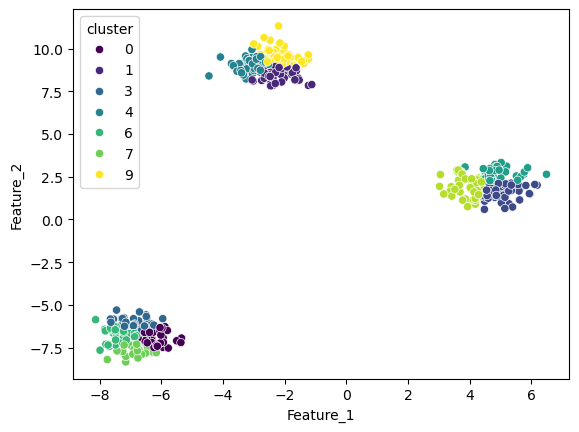

In [31]:
sns.scatterplot(
    x = df['Feature_1'], 
    y = df['Feature_2'], 
    hue= df['cluster'], 
    palette= 'viridis'
)

# KMEANS CLUSTERING AND WHY WE USE DBSCAN INSTEAD

In [33]:
from sklearn.datasets import make_moons

In [34]:
X, y_true = make_moons(n_samples = 500, noise =0.05, random_state = 42)

In [35]:
from sklearn.cluster import KMeans, DBSCAN

In [36]:
df = pd.DataFrame(X, columns = ['Feature_1', 'Feature_2'])

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [54]:
kmeans = KMeans()
kmeans_labels = kmeans.fit_predict(X_scaled)

In [55]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

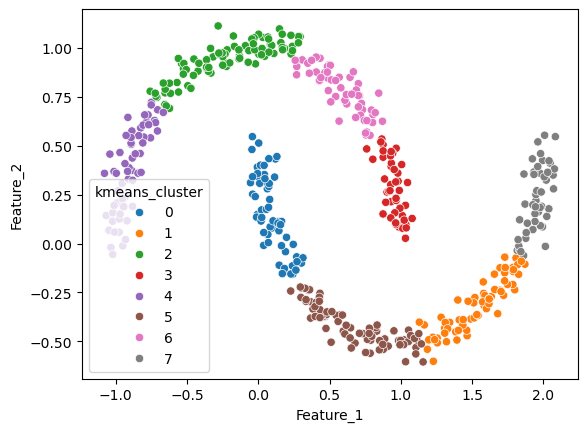

In [56]:
sns.scatterplot(x = df['Feature_1'], y = df['Feature_2'], hue = df['kmeans_cluster'], palette='tab10')

In [51]:
# DB SCAN 

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_scaled)

In [52]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

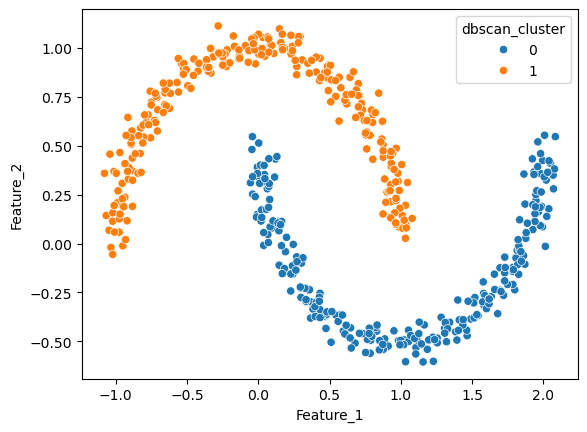

In [53]:
sns.scatterplot(x = df['Feature_1'], y = df['Feature_2'], hue = df['dbscan_cluster'], palette='tab10')